In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from ast import literal_eval
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.util import ngrams
from collections import Counter
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
movie = pd.read_csv('./data/movies_metadata.csv')
credit = pd.read_csv('./data/credits.csv')

C:\Users\rizki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
movie.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
movie['genres'] = movie['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x,list) else [])

In [6]:
movie[['title','genres']]

,title,genres
0,Toy Story,"[Animation, Comedy, Family]"
1,Jumanji,"[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[Romance, Comedy]"
3,Waiting to Exhale,"[Comedy, Drama, Romance]"
4,Father of the Bride Part II,[Comedy]
...,...,...
45461,Subdue,"[Drama, Family]"
45462,Century of Birthing,[Drama]
45463,Betrayal,"[Action, Drama, Thriller]"
45464,Satan Triumphant,[]


In [7]:
test = movie['genres'].iloc[0]
test.index("Family")

2

In [8]:
unique_list = []
count_list = []
def unique(list1):
    # traverse for all elements
    for x in list1:   
        for y in x :
            if y not in unique_list:
                unique_list.append(y)
                count_list.append(1)
            else :
                count_list[unique_list.index(y)] += 1
            
unique(movie['genres'])
print(unique_list,count_list)

['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western', 'TV Movie', 'Carousel Productions', 'Vision View Entertainment', 'Telescene Film Group Productions', 'Aniplex', 'GoHands', 'BROSTA TV', 'Mardock Scramble Production Committee', 'Sentai Filmworks', 'Odyssey Media', 'Pulser Productions', 'Rogue State', 'The Cartel'] [1935, 13182, 2770, 3496, 2313, 6735, 20265, 6596, 4307, 7624, 4673, 1398, 3049, 2467, 1323, 1622, 1598, 3932, 1042, 767, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [9]:
genres_data = pd.DataFrame(list(zip(unique_list, count_list)),
               columns =['Genre', 'Total']).reset_index()
genres_data

,index,Genre,Total
0,0,Animation,1935
1,1,Comedy,13182
2,2,Family,2770
3,3,Adventure,3496
4,4,Fantasy,2313
5,5,Romance,6735
6,6,Drama,20265
7,7,Action,6596
8,8,Crime,4307
9,9,Thriller,7624


<AxesSubplot:xlabel='Genre'>

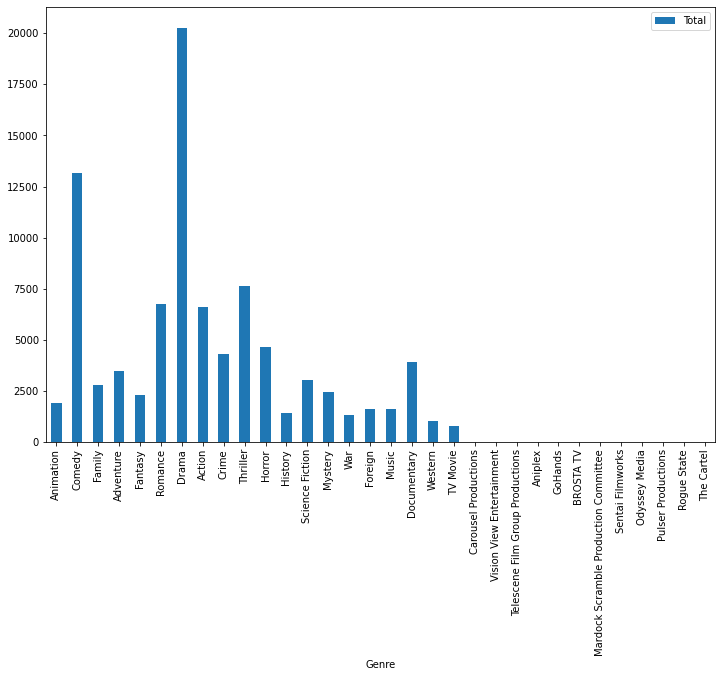

In [10]:

genres_data.plot(x='Genre',y='Total',kind='bar',figsize=(12,8))

In [11]:
print(movie['title'] [0])
print(movie['overview'][0])

Toy Story
Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.


In [12]:
print(movie['title'] [123])
print(movie['overview'][123])

Flirting with Disaster
Adopted as a child, new father Mel Colpin (Ben Stiller) decides he cannot name his son until he knows his birth parents, and determines to make a cross-country quest to find them. Accompanied by his wife, Nancy (Patricia Arquette), and an inept yet gorgeous adoption agent, Tina (Tea Leoni), he departs on an epic road trip that quickly devolves into a farce of mistaken identities, wrong turns, and overzealous and love-struck ATF agents (Josh Brolin, Richard Jenkins).


In [13]:
movie['word_count'] = movie['overview'].apply(lambda x : len(str(x).split()))

<AxesSubplot:xlabel='word_count', ylabel='Count'>

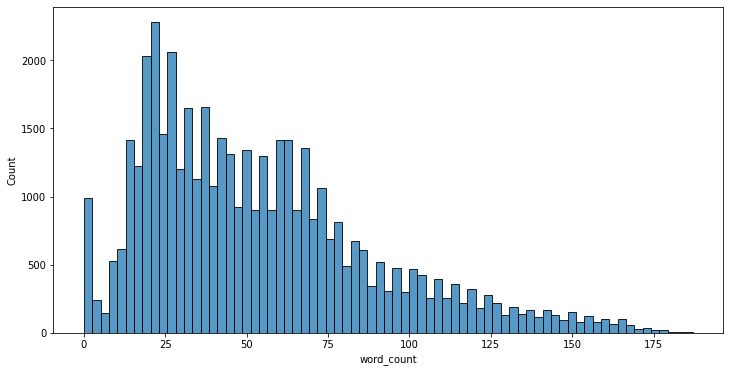

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(movie, x = 'word_count')

<AxesSubplot:title={'center':'Top 20 Part-of-speech tagging for comments'}>

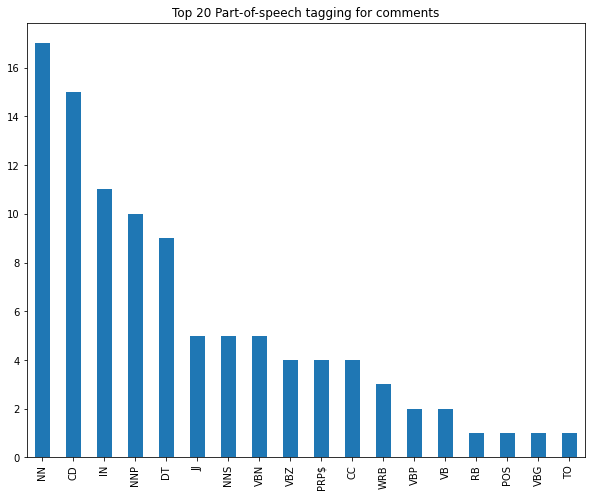

In [15]:
from textblob import TextBlob
blob = TextBlob(str(movie['overview']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for comments")

In [24]:
movie['overview']= movie['overview'].apply(lambda x : str(x))

<AxesSubplot:title={'center':'Bigram disribution for top 20 words'}, xlabel='bigram'>

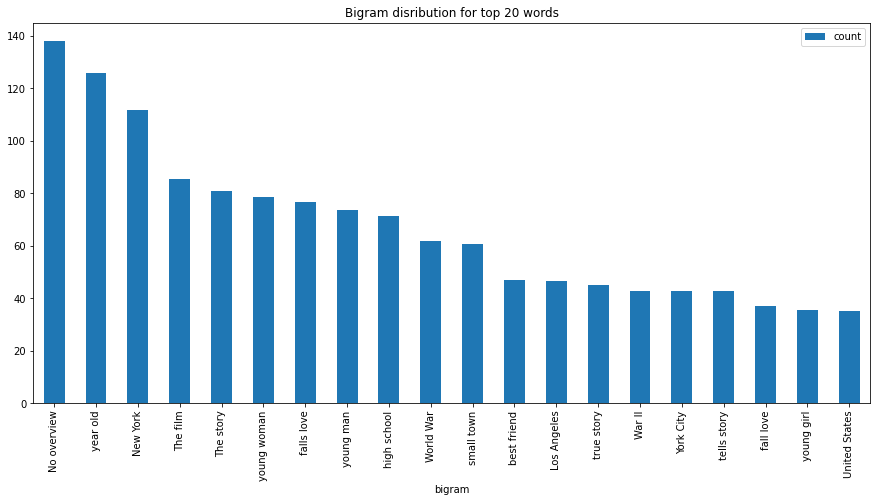

In [25]:
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(movie['overview'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for top 20 words", figsize = (15,7), )

<AxesSubplot:title={'center':'trigram disribution for top 20 words'}, xlabel='bigram'>

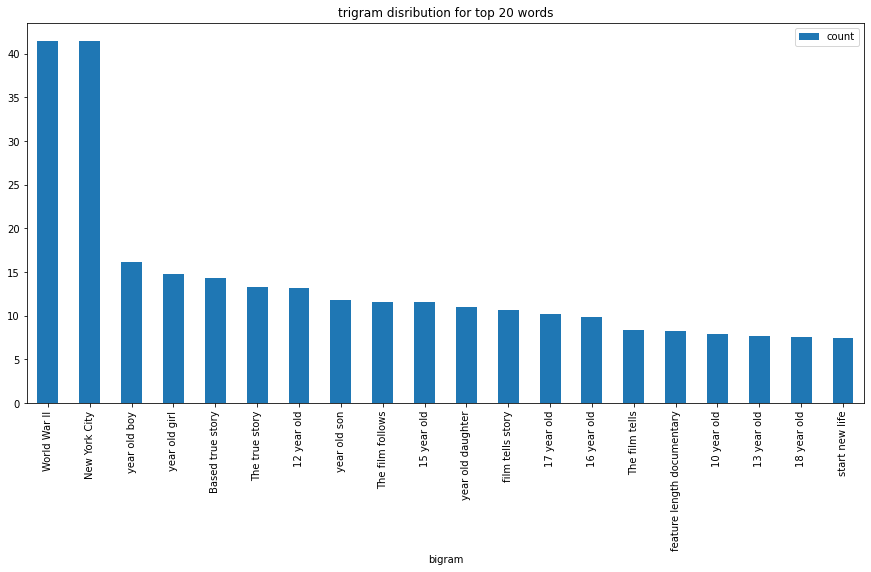

In [26]:
tf = TfidfVectorizer(ngram_range=(3,3),stop_words='english',lowercase=False)
tfidf_matrix = tf.fit_transform(movie['overview'])
total_words= tfidf_matrix.sum(axis=0)
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "trigram disribution for top 20 words", figsize = (15,7), )

In [29]:
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for converting into lower case
def make_lower_case(text):
    return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

# Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Applying all the functions in description and storing as a cleaned_desc
movie['cleaned_desc'] = movie['overview'].apply(_removeNonAscii)
movie['cleaned_desc'] = movie.cleaned_desc.apply(func = make_lower_case)
movie['cleaned_desc'] = movie.cleaned_desc.apply(func = remove_stop_words)
movie['cleaned_desc'] = movie.cleaned_desc.apply(func=remove_punctuation)
movie['cleaned_desc'] = movie.cleaned_desc.apply(func=remove_html)

In [30]:
from nltk.tokenize import RegexpTokenizer
movie['cleaned_desc'].head(3)

0    led woody andy s toys live happily room andy s...
1    siblings judy peter discover enchanted board g...
2    family wedding reignites ancient feud next doo...
Name: cleaned_desc, dtype: object

In [31]:
movie['cleaned_desc'].iloc[0]

'led woody andy s toys live happily room andy s birthday brings buzz lightyear onto scene afraid losing place andy s heart woody plots buzz circumstances separate buzz woody owner duo eventually learns put aside differences'

In [32]:
movie['overview'].iloc[4]

"Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home, but that's a plan that -- like George -- will have to change with the arrival of both a grandchild and a kid of his own."

In [33]:
def get_genres(df,genre):
    title = []
    desc = []
    genres = []
    for index, row in movie.iterrows():
        if genre in row['genres']:
            title.append(row['title'])
            desc.append(row['cleaned_desc'])
            genres.append(row['genres'])
    data = pd.DataFrame(list(zip(title, desc,genres)),
               columns =['title', 'desc','genre'])
    return data
    
data = get_genres(movie,'Comedy')



In [80]:
def get_recommend(title,genre):
    data = get_genres(movie,genre)
    indices = pd.Series(data.index, index = data['title'])
    #convert data into bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['desc'])
    #calculate similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    print(sg)
    idx = indices[title]
    sig = list(enumerate(sg[idx]))
    sig = sorted(sig,key=lambda x : x[1],reverse=True )
    sig = sig[1:10]
    movie_indices = [i[0] for i in sig]
    print(sig)
    rec = data[['title','genre','desc']].iloc[movie_indices]
    return rec
    
    
hasil = get_recommend('Toy Story', 'Animation')
    
    

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[(89, 0.08119806225112267), (450, 0.034037029548169284), (1625, 0.03381928880077296), (284, 0.033816991687777014), (1301, 0.02712244951959284), (709, 0.02600520506337884), (685, 0.024543924143696577), (750, 0.018531463211500253), (1211, 0.017406970464055635)]


In [81]:
hasil

,title,genre,desc
89,Toy Story 2,"[Animation, Comedy, Family]",andy heads cowboy camp leaving toys devices th...
450,Toy Story 3,"[Animation, Family, Comedy]",woody buzz rest andy s toys played years andy ...
1625,My Life as a Zucchini,"[Animation, Drama, Family]",mothers death zucchini befriended kind police ...
284,The Wild,"[Family, Animation]",adolescent lion accidentally shipped new york ...
1301,Ye Olden Days,[Animation],princess minnie wed prince goofy still known d...
709,Justice League: War,[Animation],world attack alien armada led powerful apokoli...
685,Free Birds,"[Animation, Comedy, Family]",irreverent hilarious adventurous buddy comedy ...
750,Alpha and Omega 3: The Great Wolf Games,"[Animation, Family, Adventure, Comedy]",join pack wild warmhearted totally pawsome adv...
1211,Ooops! Noah is Gone...,"[Animation, Adventure, Comedy]",end world flood coming luckily dave son finny ...


In [78]:
hasil = get_recommend('Star Wars: Episode II - Attack of the Clones', 'Adventure')

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[(1082, 0.06627573686778022), (1353, 0.04460940181775517), (302, 0.031334021467193204), (3306, 0.031053789902005705), (729, 0.030143198939570626), (1305, 0.024518541385817588), (1292, 0.02285535961008741), (2963, 0.02200425204440921), (2998, 0.02129661954491856)]


In [79]:
hasil

,title,genre,desc
1082,Star Wars: Episode III - Revenge of the Sith,"[Science Fiction, Adventure, Action]",years onset clone wars noble jedi knights lead...
1353,Star Wars: The Clone Wars,"[Thriller, Animation, Action, Science Fiction,...",set episode ii iii clone wars first computer a...
302,Star Wars: Episode I - The Phantom Menace,"[Adventure, Action, Science Fiction]",anakin skywalker young slave strong force disc...
3306,Legends of the Hidden Temple,"[Adventure, Family]",three siblings break away lackluster temple to...
729,Shenandoah,"[Action, Adventure, Drama, Western]",charlie anderson farmer shenandoah virginia fi...
1305,Witless Protection,"[Action, Adventure, Comedy, Crime]",story centers small town sheriff witnesses bel...
1292,The Mission,"[Action, Adventure, Drama, Science Fiction]",triad boss lung eddy ko escaped killed assassi...
2963,Diablo,"[Action, Adventure, Thriller, Western]",young civil war veteran forced desperate journ...
2998,Mojin: The Lost Legend,"[Action, Adventure, Fantasy]",beginning 1990s famous tomb explorer hu bayi d...
